## DATA CLEANING

In [1]:
import numpy as np
import pandas as pd 
import warnings

In [2]:
df = pd.read_csv('DATA/bank_transactions.csv')

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df=df.drop(['TransactionID'],axis=1)

In [5]:
def loc(x):
    if x=='NAVI MUMBAI':
        return 'MUMBAI'
    elif x=='NEW DELHI':
        return 'DELHI'
    return x

In [6]:
df['CustLocation'] = df['CustLocation'].apply(lambda x:loc(x))

In [7]:
df.isnull().sum()

CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [10]:
df['CustomerDOB'].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
24/7/51         1
10/5/02         1
14/3/02         1
13/11/36        1
28/7/50         1
Name: CustomerDOB, Length: 17233, dtype: int64

In [11]:
df = df.loc[~(df['CustomerDOB']=='1/1/1800')]

In [12]:
df['CustomerDOB'].value_counts()

1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
11/7/49       1
22/12/61      1
6/4/46        1
5/4/32        1
20/10/54      1
Name: CustomerDOB, Length: 17232, dtype: int64

In [13]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [14]:
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5


In [15]:
df.loc[df['CustomerDOB'].dt.year >= 2021, ['CustomerDOB']] -= pd.DateOffset(years = 100)
df['CustomerAge'] = (pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'Y')

In [16]:
df = df.rename(columns={'TransactionAmount(INR)':'TransactionAmount'})

In [17]:
df = df.astype({'CustomerAge':int})

In [18]:
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,27
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,64
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,25
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,48
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,33


In [19]:
df['TransactionYear'] = 2016*np.ones(len(df),dtype=int)

In [20]:
df['TransactionMonth'] = df['TransactionDate'].dt.month

## DATA TRANSFORMATION

In [21]:
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionYear,TransactionMonth
0,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,27,2016,8
1,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,64,2016,8
2,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,25,2016,8
3,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,48,2016,8
4,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-08-02,181156,1762.5,33,2016,8


## ONE-HOT ENCODING FOR GENDER CATEGORY

In [22]:
df['CustGender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
gend_df = pd.get_dummies(df['CustGender'],drop_first=True)

In [24]:
df = pd.concat([df.drop('CustGender',axis=1),gend_df],axis=1)

## HOUR AND MINUTE OF TRANSACTION

In [25]:
def trans_hr(x):
    return int(x/10000)
def trans_min(x):
    return int((x%10000)/100)

In [26]:
df['TransactionTime(hr)'] = df['TransactionTime'].apply(lambda x:trans_hr(x))
df['TransactionTime(min)'] = df['TransactionTime'].apply(lambda x:trans_min(x))

In [27]:
df.head()

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionYear,TransactionMonth,M,TransactionTime(hr),TransactionTime(min)
0,C5841053,1994-10-01,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,27,2016,8,0,14,32
1,C2142763,1957-04-04,JHAJJAR,2270.69,2016-08-02,141858,27999.0,64,2016,8,1,14,18
2,C4417068,1996-11-26,MUMBAI,17874.44,2016-08-02,142712,459.0,25,2016,8,0,14,27
3,C5342380,1973-09-14,MUMBAI,866503.21,2016-08-02,142714,2060.0,48,2016,8,0,14,27
4,C9031234,1988-03-24,MUMBAI,6714.43,2016-08-02,181156,1762.5,33,2016,8,0,18,11


In [28]:
df.drop('TransactionTime',inplace=True,axis=1)

## DIVIDING CUSTOMER AGE INTO CATEGORIES

In [29]:
df['CustomerAge'].max(),df['CustomerAge'].min()

(100, 1)

In [30]:
df[df['CustomerAge']<18]

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionYear,TransactionMonth,M,TransactionTime(hr),TransactionTime(min)
485,C8013820,2004-12-07,CHENNAI,6661.03,2016-10-21,110.00,17,2016,10,0,21,51
5491,C1213940,2007-02-12,CHANDAULI,17728.06,2016-09-22,11499.00,14,2016,9,1,6,19
8173,C1017880,2013-02-20,DELHI,20257.22,2016-09-25,359.52,8,2016,9,1,19,17
12413,C2721860,2005-05-01,CHENNAI,5139.73,2016-09-22,95.00,16,2016,9,0,13,25
12531,C5333741,2010-10-18,FARIDABAD,29225.01,2016-09-27,500.00,11,2016,9,1,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1022447,C4825367,2008-12-05,DELHI,79984.60,2016-09-13,285.00,13,2016,9,0,18,59
1035678,C8528348,2012-07-03,NASHIK,26000.92,2016-09-13,570.00,9,2016,9,1,10,26
1039547,C5632444,2004-07-03,GHAZIABAD,47042.24,2016-09-18,147.00,17,2016,9,0,14,19
1045629,C8010686,2005-08-15,GURGAON,43573.32,2016-09-18,902.00,16,2016,9,0,11,34


In [31]:
df = df.loc[~(df['CustomerAge']<18)]

In [32]:
df[df['CustomerAge']<18]

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionYear,TransactionMonth,M,TransactionTime(hr),TransactionTime(min)


In [33]:
df['CustomerAge'].max(),df['CustomerAge'].min()

(100, 18)

In [34]:
def ageRange(x):
    y = int(x/10)
    if y==2:
        return '20-29'
    elif y==3:
        return '30-39'
    elif y==4:
        return '40-49'
    elif y==5:
        return '50-59'
    elif y==6:
        return '60-69'
    elif y==7:
        return '70-79'
    elif y==8:
        return '80-89'
    elif y==9:
        return '90-99'
    elif y==10:
        return '100-109'
    else:
        return '18-19'

In [35]:
df['AgeRange'] = df['CustomerAge'].apply(lambda x:ageRange(x))

In [36]:
df['AgeRange']

0          20-29
1          60-69
2          20-29
3          40-49
4          30-39
           ...  
1048562    30-39
1048563    20-29
1048564    30-39
1048565    40-49
1048566    30-39
Name: AgeRange, Length: 984999, dtype: object

In [37]:
df.head()

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionYear,TransactionMonth,M,TransactionTime(hr),TransactionTime(min),AgeRange
0,C5841053,1994-10-01,JAMSHEDPUR,17819.05,2016-08-02,25.0,27,2016,8,0,14,32,20-29
1,C2142763,1957-04-04,JHAJJAR,2270.69,2016-08-02,27999.0,64,2016,8,1,14,18,60-69
2,C4417068,1996-11-26,MUMBAI,17874.44,2016-08-02,459.0,25,2016,8,0,14,27,20-29
3,C5342380,1973-09-14,MUMBAI,866503.21,2016-08-02,2060.0,48,2016,8,0,14,27,40-49
4,C9031234,1988-03-24,MUMBAI,6714.43,2016-08-02,1762.5,33,2016,8,0,18,11,30-39


In [38]:
df['TransactionDate'].dt.year.unique()

array([2016], dtype=int64)

This dataset consists of transactions that take place only in 2016. So 'TransactionYear' column has only one value and it can be removed from the dataset

In [39]:
df.drop('TransactionYear',axis=1,inplace=True)

## DIVIDING THE TRANSACTION AMOUNT INTO CATEGORIES

In [40]:
df['TransactionAmount (INR)'].max(),df['TransactionAmount (INR)'].min()

(1560034.99, 0.0)

In [41]:
def transRange(x):
    y = int(x/300000)
    if y==0:
        return '0-2.99'
    elif y==1:
        return '3-5.99'
    elif y==2:
        return '6-8.99'
    elif y==3:
        return '9-11.99'
    elif y==4:
        return '12-14.99'
    else:
        return '15'

In [42]:
df['TransactionRange(L)'] = df['TransactionAmount (INR)'].apply(lambda x:transRange(x))

In [43]:
df['TransactionRange(L)'].value_counts()

0-2.99      984963
3-5.99          29
6-8.99           4
15               1
9-11.99          1
12-14.99         1
Name: TransactionRange(L), dtype: int64

In [44]:
df[df['TransactionRange(L)']=='0-2.99']['TransactionAmount (INR)'].max(),df[df['TransactionRange(L)']=='0-2.99']['TransactionAmount (INR)'].min()

(299009.96, 0.0)

## DIVIDING '0-2.99'

In [45]:
def trans_type(x,y):
    if y=='0-2.99':
        z = int(x/60000)
        if z==0:
            return 'small1'
        elif y==1:
            return 'small2'
        elif y==2:
            return 'small3'
        elif y==3:
            return 'small4'
        else:
            return 'small5'
    elif y=='3-5.99':
        return 'medium'
    else:
        return 'large'

In [46]:
df['TransactionType'] = df.apply(lambda x:trans_type(x['TransactionAmount (INR)'],x['TransactionRange(L)']),axis=1)

In [47]:
df['TransactionType'].value_counts()

small1    983660
small5      1303
medium        29
large          7
Name: TransactionType, dtype: int64

## AM OR PM

In [48]:
def am(x):
    if x<12:
        return 1
    return 0

In [49]:
df['AM'] = df['TransactionTime(hr)'].apply(am)

In [50]:
df.head()

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionMonth,M,TransactionTime(hr),TransactionTime(min),AgeRange,TransactionRange(L),TransactionType,AM
0,C5841053,1994-10-01,JAMSHEDPUR,17819.05,2016-08-02,25.0,27,8,0,14,32,20-29,0-2.99,small1,0
1,C2142763,1957-04-04,JHAJJAR,2270.69,2016-08-02,27999.0,64,8,1,14,18,60-69,0-2.99,small1,0
2,C4417068,1996-11-26,MUMBAI,17874.44,2016-08-02,459.0,25,8,0,14,27,20-29,0-2.99,small1,0
3,C5342380,1973-09-14,MUMBAI,866503.21,2016-08-02,2060.0,48,8,0,14,27,40-49,0-2.99,small1,0
4,C9031234,1988-03-24,MUMBAI,6714.43,2016-08-02,1762.5,33,8,0,18,11,30-39,0-2.99,small1,0


## BASIC VISUALIZATION

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

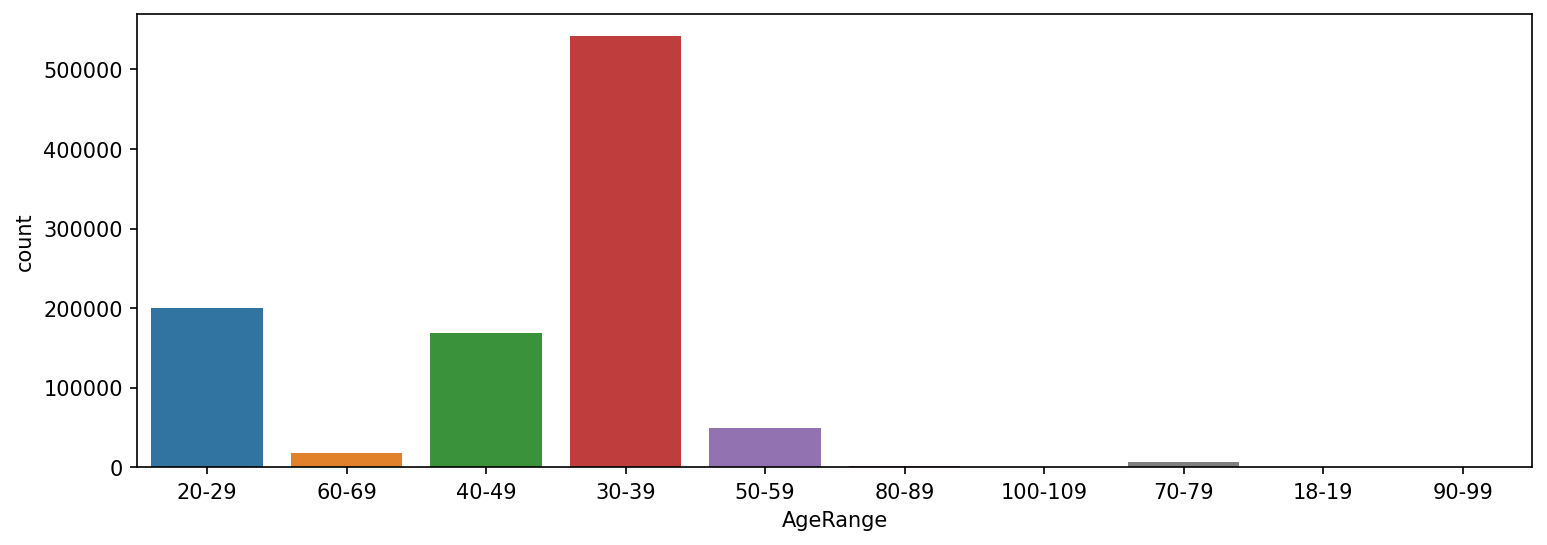

In [52]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=df,x='AgeRange')
plt.savefig('age.png')

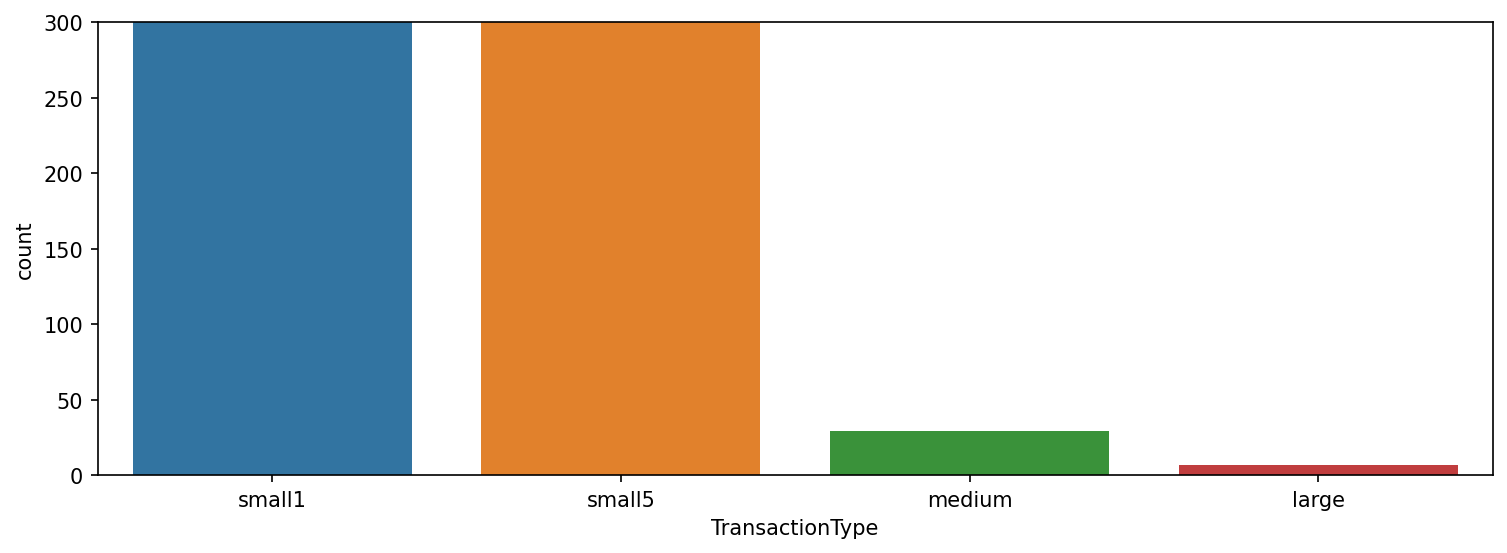

In [53]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=df,x='TransactionType')
plt.ylim(0,300)
plt.savefig('trans.png')

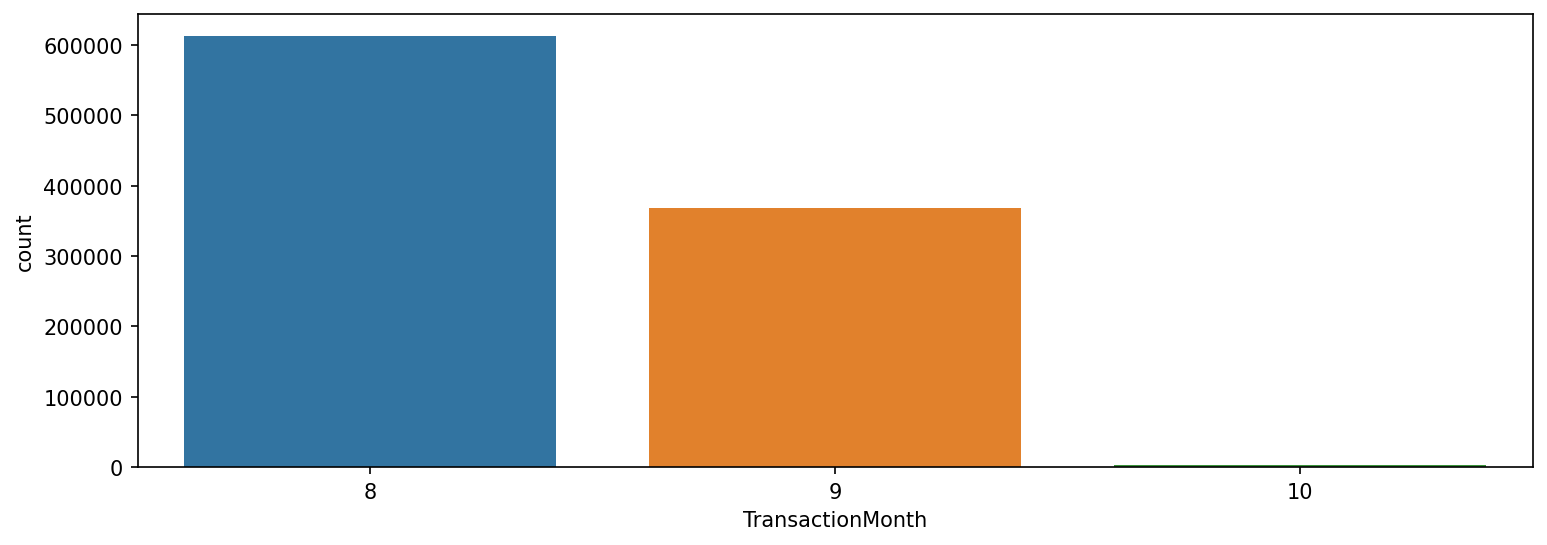

In [54]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=df,x='TransactionMonth')
plt.savefig('transmonth.png')

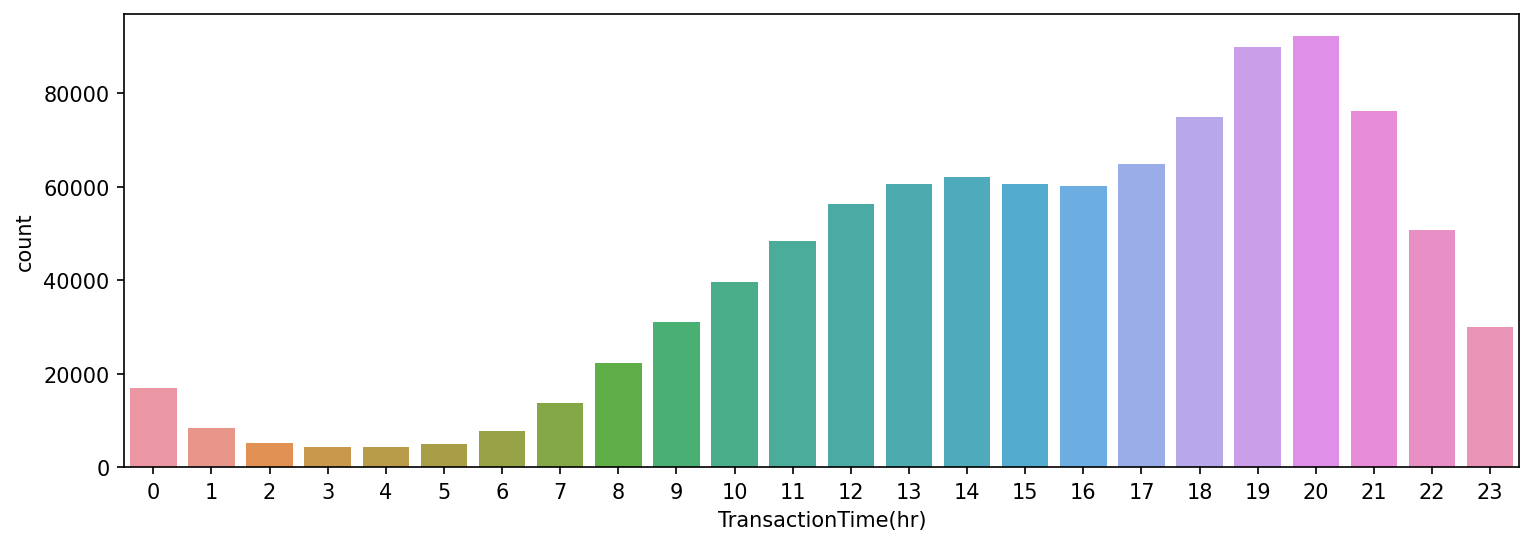

In [55]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=df,x='TransactionTime(hr)')
plt.savefig('transhr.png')

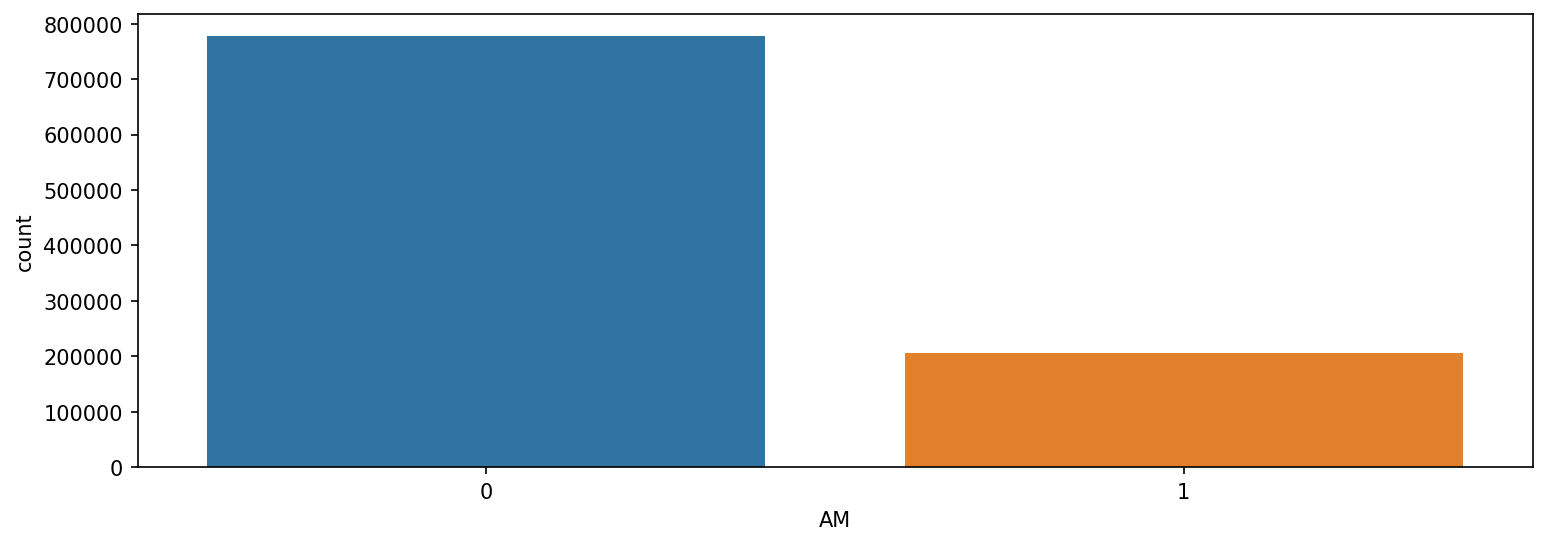

In [56]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=df,x='AM')
plt.savefig('pod.png')

## SCALING THE DATASET

In [57]:
df.columns

Index(['CustomerID', 'CustomerDOB', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionAmount (INR)', 'CustomerAge',
       'TransactionMonth', 'M', 'TransactionTime(hr)', 'TransactionTime(min)',
       'AgeRange', 'TransactionRange(L)', 'TransactionType', 'AM'],
      dtype='object')

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['TransactionAmount (INR)','CustAccountBalance']]
scaled_X = scaler.fit_transform(X)
scaled_df = df
scaled_df[['TransactionAmount (INR)','CustAccountBalance']] = scaled_X

In [59]:
scaled_df

,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,TransactionMonth,M,TransactionTime(hr),TransactionTime(min),AgeRange,TransactionRange(L),TransactionType,AM
0,C5841053,1994-10-01,JAMSHEDPUR,-0.107885,2016-08-02,-0.232423,27,8,0,14,32,20-29,0-2.99,small1,0
1,C2142763,1957-04-04,JHAJJAR,-0.126892,2016-08-02,4.323506,64,8,1,14,18,60-69,0-2.99,small1,0
2,C4417068,1996-11-26,MUMBAI,-0.107818,2016-08-02,-0.161741,25,8,0,14,27,20-29,0-2.99,small1,0
3,C5342380,1973-09-14,MUMBAI,0.929583,2016-08-02,0.099003,48,8,0,14,27,40-49,0-2.99,small1,0
4,C9031234,1988-03-24,MUMBAI,-0.121460,2016-08-02,0.050551,33,8,0,18,11,30-39,0-2.99,small1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,1990-08-04,DELHI,-0.120335,2016-09-18,-0.106367,31,9,1,18,48,30-39,0-2.99,small1,0
1048563,C6459278,1992-02-20,NASHIK,-0.096281,2016-09-18,-0.161578,29,9,1,18,37,20-29,0-2.99,small1,0
1048564,C6412354,1989-05-18,HYDERABAD,0.141417,2016-09-18,-0.111090,32,9,1,18,33,30-39,0-2.99,small1,0
1048565,C6420483,1978-08-30,VISAKHAPATNAM,-0.117300,2016-09-18,-0.073632,43,9,1,18,47,40-49,0-2.99,small1,0


In [60]:
df.shape

(984999, 15)

After the data had been cleaned there were 11 features. After data transformation the dataset now has 15 features. Some were added and some were removed. Two dataframes are available here. One is scaled and the other one is unscaled.